In [1]:
# libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# load the data 
data = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [4]:
# view the data 
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


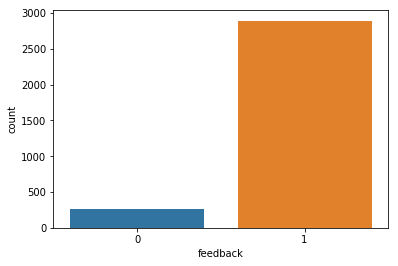

In [6]:
# Exploring the data( visualizations)
sns.countplot(data['feedback'], label = 'count')

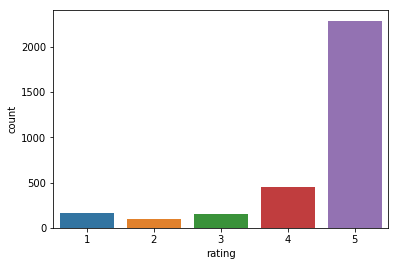

In [7]:
# visualizing the ratings feature 
sns.countplot(data['rating'])

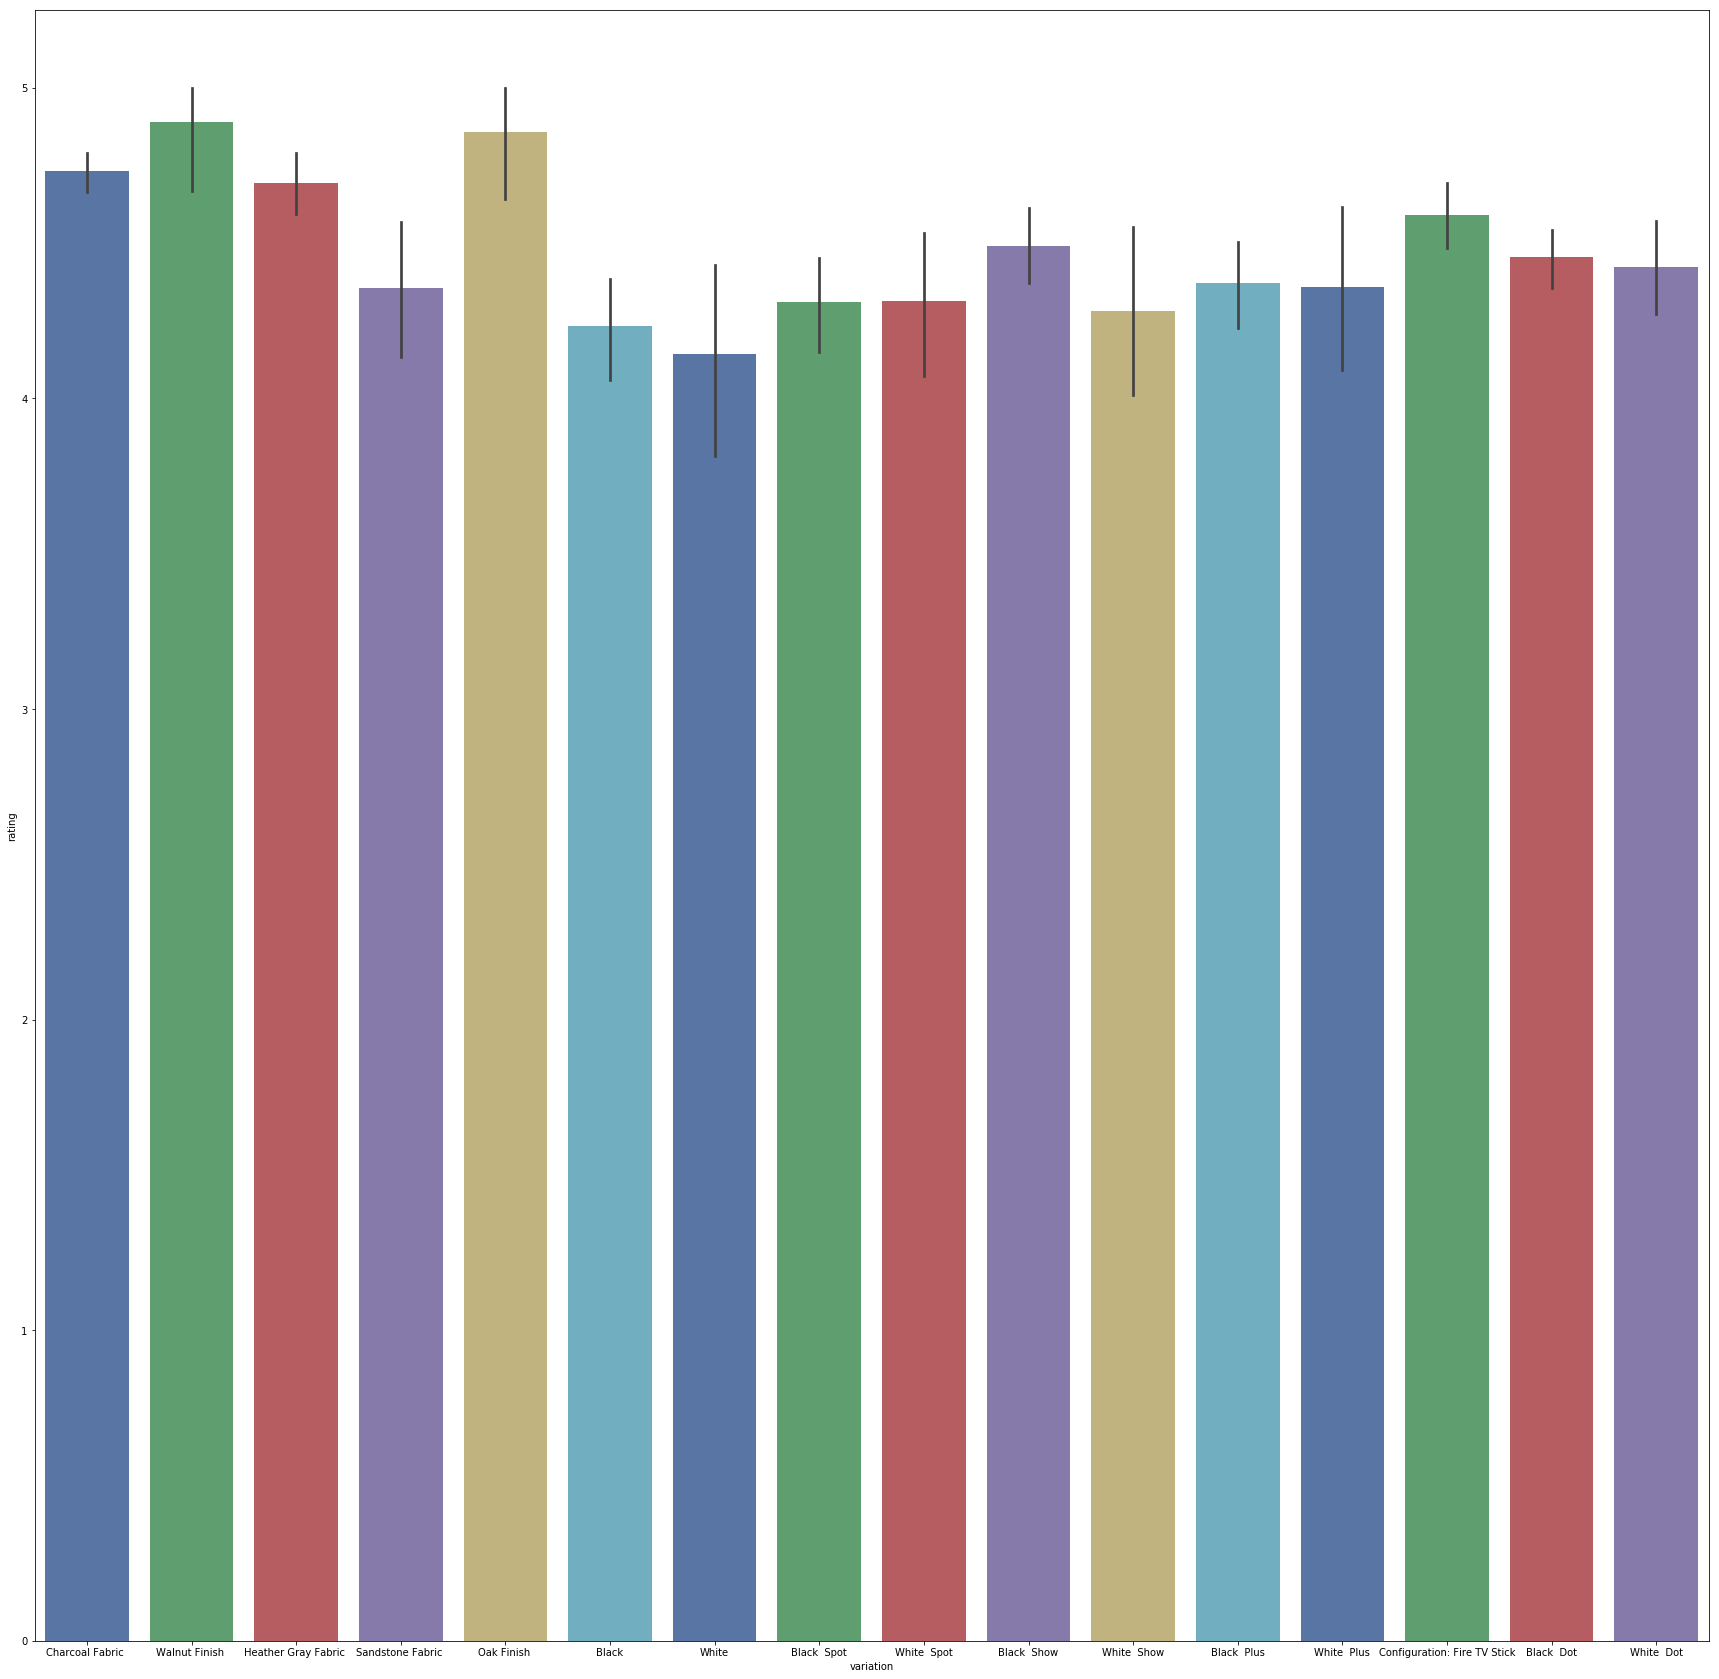

In [12]:
plt.figure(figsize = (30, 30))
sns.barplot(x = 'variation', y ='rating', data = data, palette = 'deep')

In [14]:
# wordcloud( combining all the reviews into a single list)
list = data['verified_reviews'].tolist()

In [16]:
# combining all the words 
words = ' '.join(list)

In [17]:
words

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

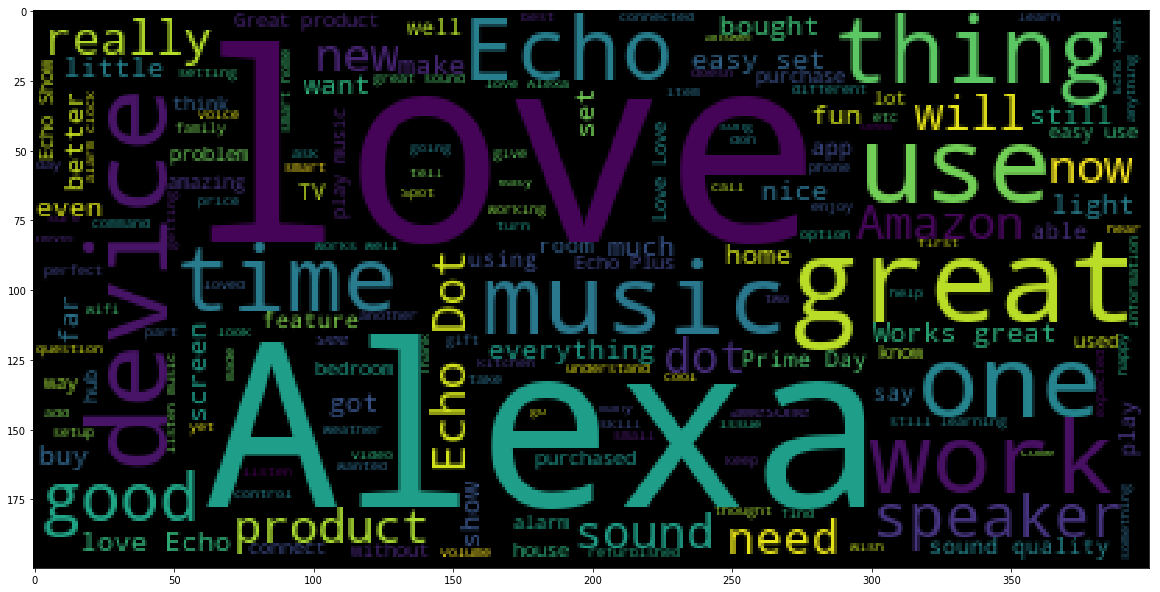

In [18]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(words))

In [19]:
# wordcloud for only the negative reviews
negative = data [ data['feedback'] == 0]

In [28]:
negative['verified_reviews']

46      It's like Siri, in fact, Siri answers more acc...
111     Sound is terrible if u want good music too get...
141                                    Not much features.
162     Stopped working after 2 weeks ,didn't follow c...
176                                  Sad joke. Worthless.
187     Really disappointed Alexa has to be plug-in to...
205     It's got great sound and bass but it doesn't w...
233     I am not super impressed with Alexa. When my P...
299     Too difficult to set up.  It keeps timing out ...
341                                Alexa hardly came on..
350     Item no longer works after just 5 months of us...
361     This thing barely works. You have to select 3r...
368     I returned 2 Echo Dots & am only getting refun...
369                                           not working
373             I'm an Echo fan but this one did not work
374                                                      
376     Doesn't always respond when spoken to with pro...
381     It wor

In [29]:
# feature engineering 
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer()
alexa = vectorizer.fit_transform(data['verified_reviews'])

In [34]:
alexa_array = alexa.toarray()

'Love my Echo!'

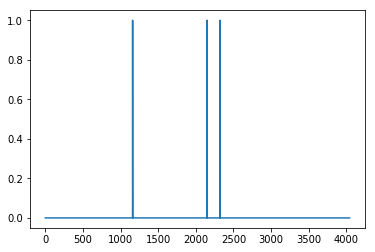

In [41]:

plt.plot(alexa_array[0, :])
data['verified_reviews'][0]

In [42]:
data['length'] = data['verified_reviews'].apply(len)

In [43]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


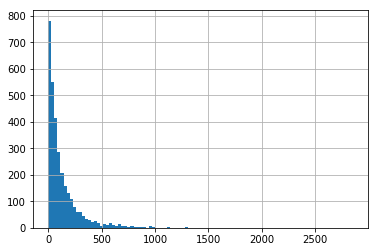

In [45]:
data['length'].hist(bins = 100)

In [46]:
# finding the minimum  and maximum length review
min_char = data['length'].min()

In [47]:
min_char

1

In [48]:
data[data['length'] == min_char]['verified_reviews'].iloc[0]

'😍'

In [49]:
# maximum 
max_char = data['length'].max()
max_char

2851

In [50]:
data[data['length'] == max_char]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi